In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mapping import map_str_values
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

- Đọc dữ liệu

In [41]:
X_train = pd.read_csv("data/train_values.csv", index_col="building_id")
Y_train = pd.read_csv("data/train_labels.csv", index_col="building_id")

In [42]:
continuous_cols = np.array(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'age', 'area_percentage', 'height_percentage', 'count_families'])

binary_cols = X_train[X_train.columns.difference(continuous_cols)].columns.to_numpy()

continuous_idxs = np.sort(X_train.columns.get_indexer(continuous_cols))
binary_idxs = np.sort(X_train.columns.get_indexer(binary_cols))

In [43]:
encoded_temp = pd.get_dummies(X_train["count_floors_pre_eq"], prefix="count_floors").astype(int)
X_encoded = pd.get_dummies(X_train, dtype=int).drop(columns="count_floors_pre_eq")
for temp_col in encoded_temp.columns:
    X_encoded[temp_col] = encoded_temp[temp_col]

- Ma trận tương quan

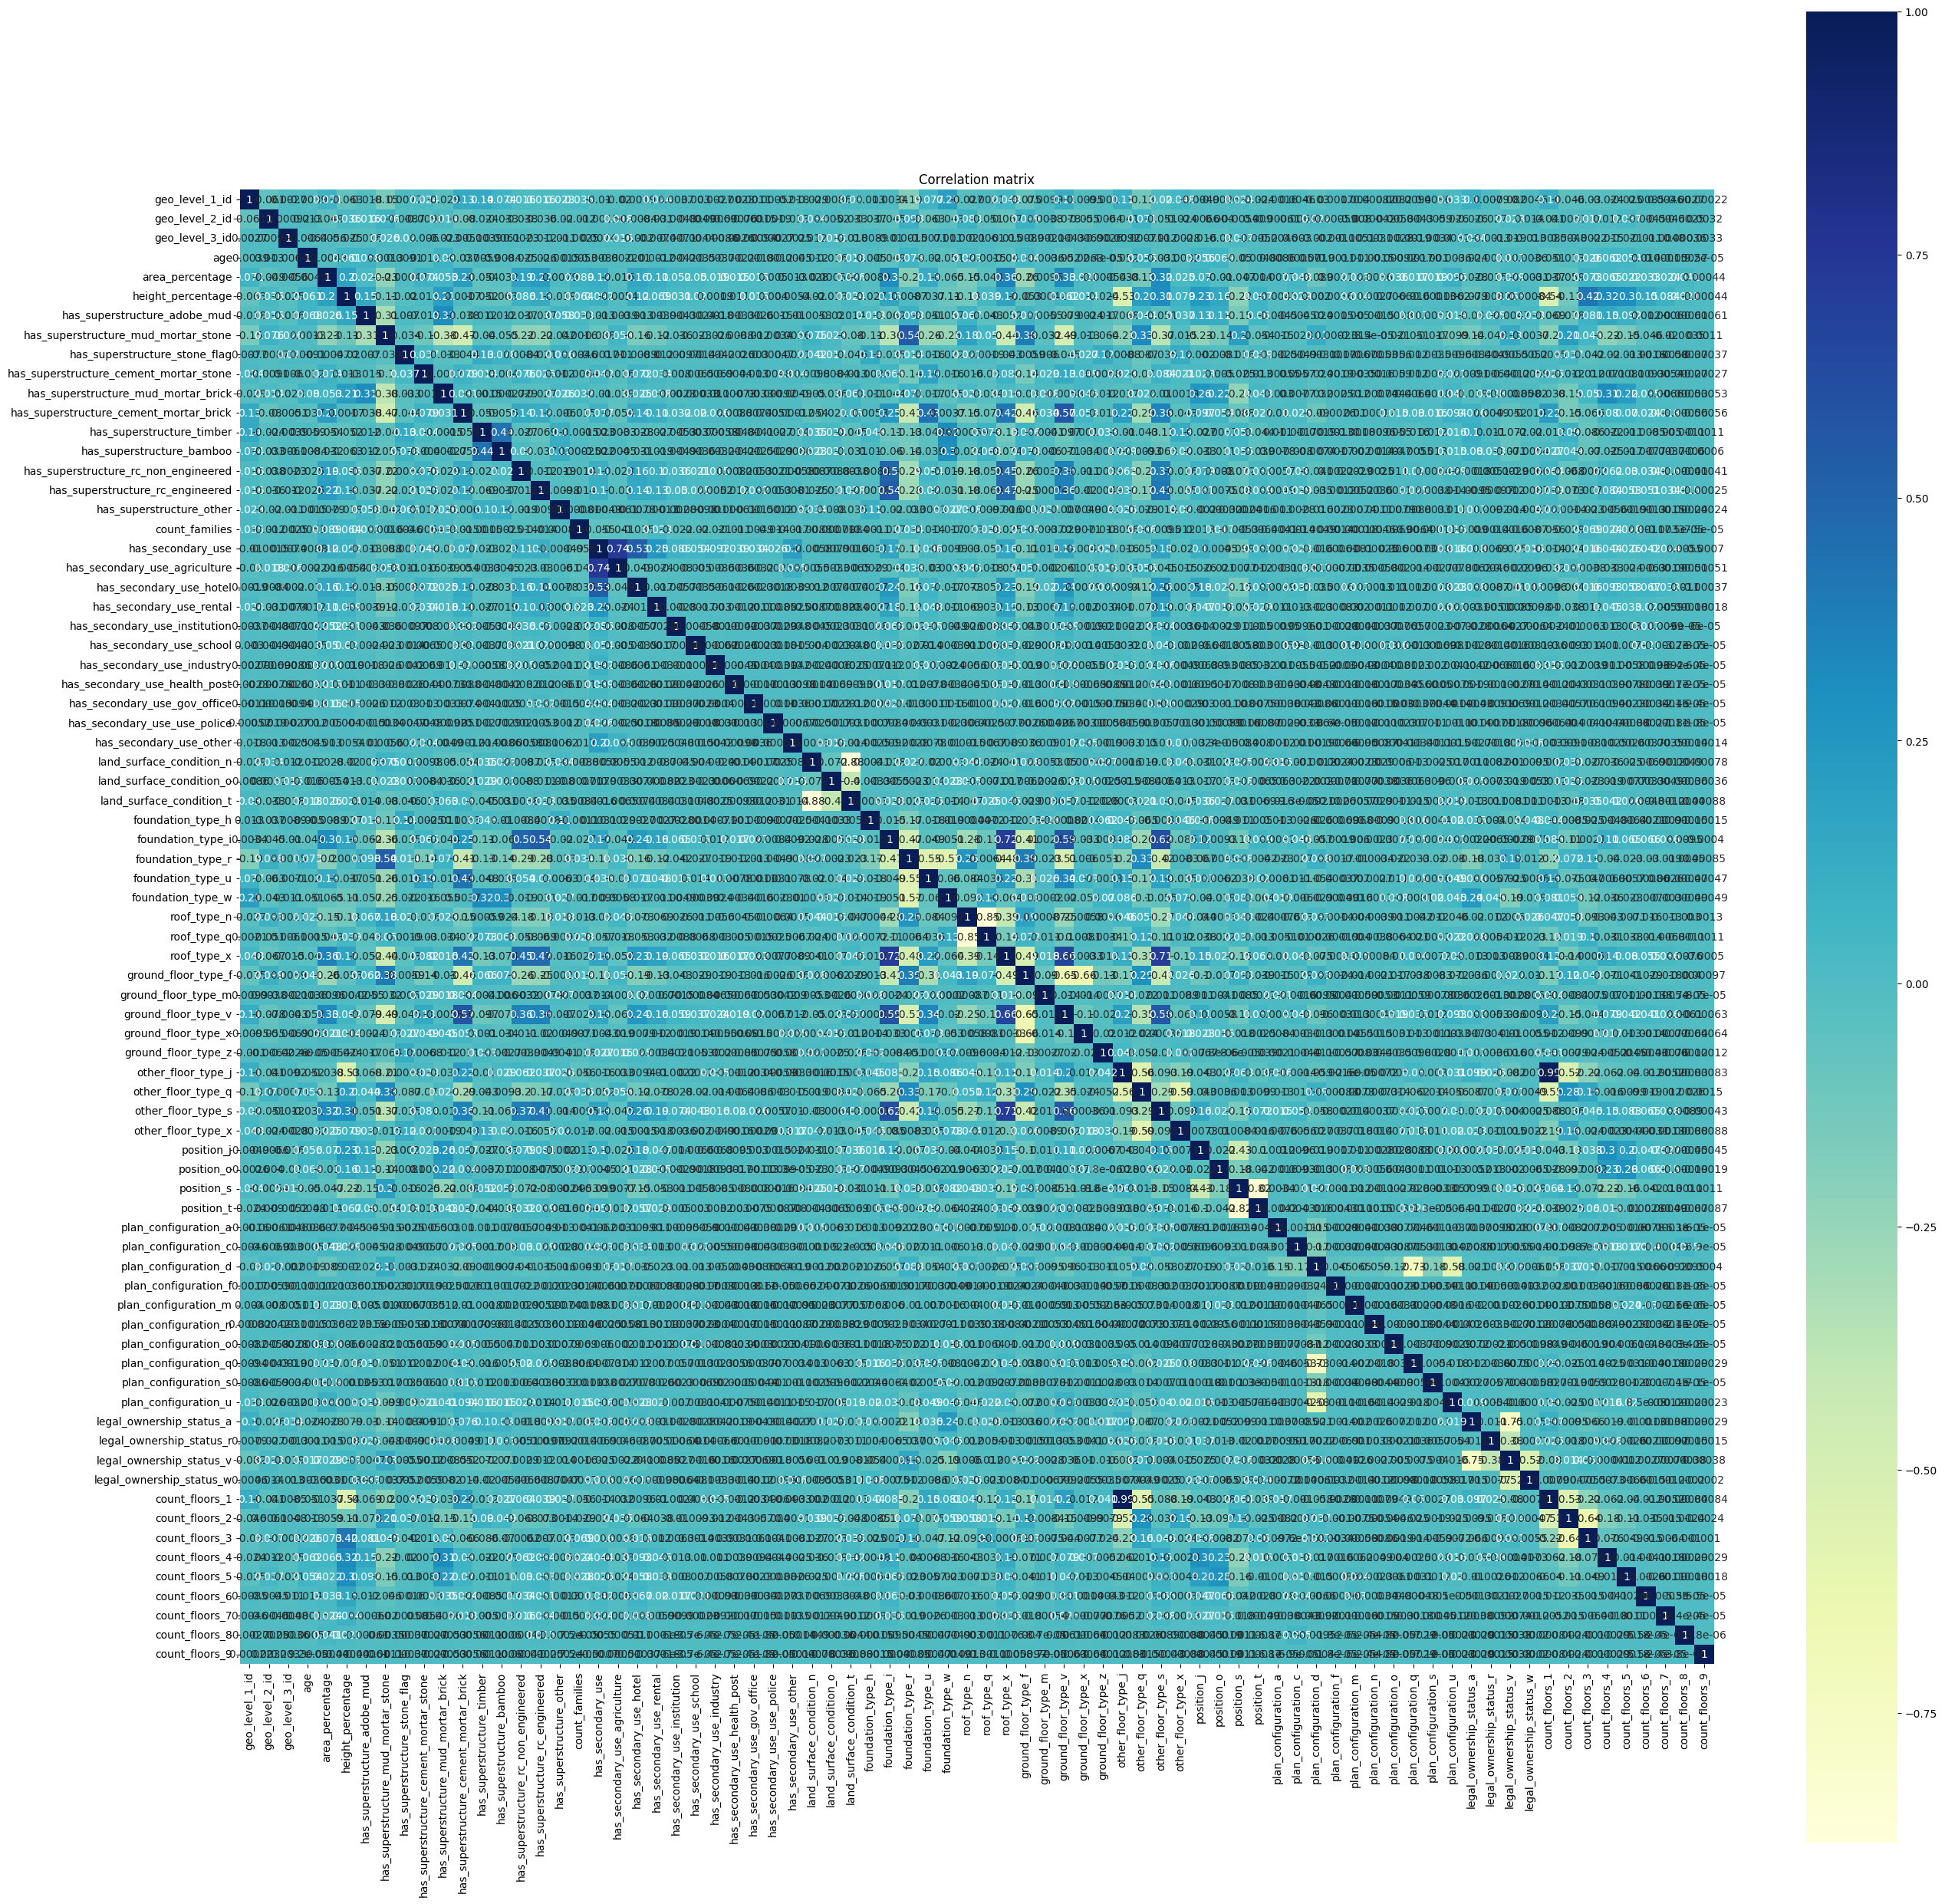

In [44]:
X_corr = X_encoded.corr()

plt.figure(figsize=(31, 31))
sns.heatmap(X_corr, vmax=1,cmap="YlGnBu", square=True, annot=True)
plt.title('Correlation matrix')
plt.show()

- Scale bộ data theo MinMaxScaler

In [45]:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X_encoded)


In [59]:
pca = PCA(n_components=3, random_state=192)
X0 = pca.fit_transform(scaled_X)
X0.shape

(260601, 3)

In [60]:
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
# print(eig_values)

print(eig_vectors[0])

[-5.82838058e-02 -1.17863232e-01  1.57932199e-03 -1.39361299e-01
  5.28649326e-02 -2.00582546e-03  6.37489340e-03 -4.57235916e-02
  6.48373360e-02 -1.25242828e-02  1.62805698e-02 -1.54494548e-02
  2.19528663e-01 -5.45898651e-02  1.25222976e-01 -1.38658520e-01
  6.73067171e-02 -1.02694407e-02  1.41114472e-01  6.52035373e-02
 -2.84282777e-02 -1.61586356e-01  2.09503337e-02  2.81648084e-02
  1.44472649e-02  3.41851035e-02  8.07925552e-02  1.05206841e-01
  4.24358576e-02 -5.15397468e-02 -3.73939122e-02 -4.13451177e-03
 -2.16353622e-02 -4.16750810e-03 -6.73885949e-02 -4.18365269e-02
 -7.80188088e-02 -3.88845194e-02 -1.04037932e-01 -1.62320118e-02
 -2.67695237e-02  1.52401415e-01  4.61338938e-02  1.01119839e-01
  2.16753561e-01 -8.14213372e-03 -1.17214350e-01 -4.27914540e-02
 -1.34796268e-02  1.93233709e-02  2.80068350e-01 -7.04716627e-01
  7.22400401e-02 -1.71619054e-02  1.19601924e-01 -5.89937695e-02
  2.24357105e-01 -1.73863152e-02  9.80714466e-02 -1.17954996e-02
  9.05326546e-03 -1.35419

In [61]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [62]:
# plt.style.use('bmh')

Text(0.5, 0, 'Dimensions')

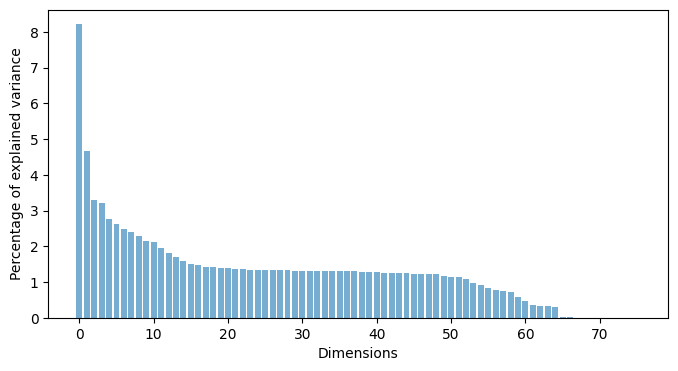

In [63]:

explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(X_encoded.shape[1]), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

Tạo color map

In [64]:
color_map = {
    1:"red",
    2:"green",
    3:"blue"
}

colors = Y_train["damage_grade"].map(color_map)

In [65]:
pc1 = X0[:, 0]
pc2 = X0[:, 1]
pc3 = X0[:, 2]

<Figure size 640x480 with 0 Axes>

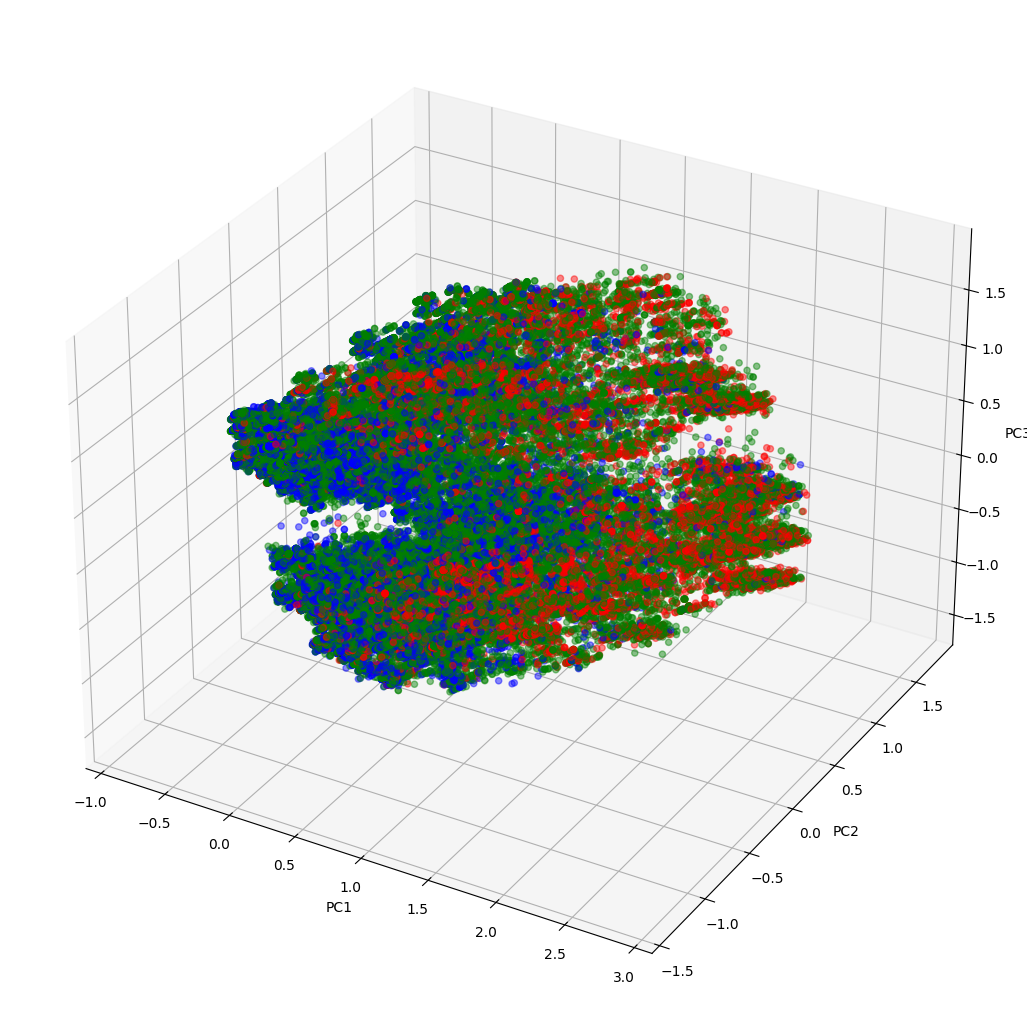

In [66]:
fig = plt.figure()
fig = plt.figure(figsize=(13, 14))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(pc1, pc2, pc3, c=colors, marker="o", alpha=0.45)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


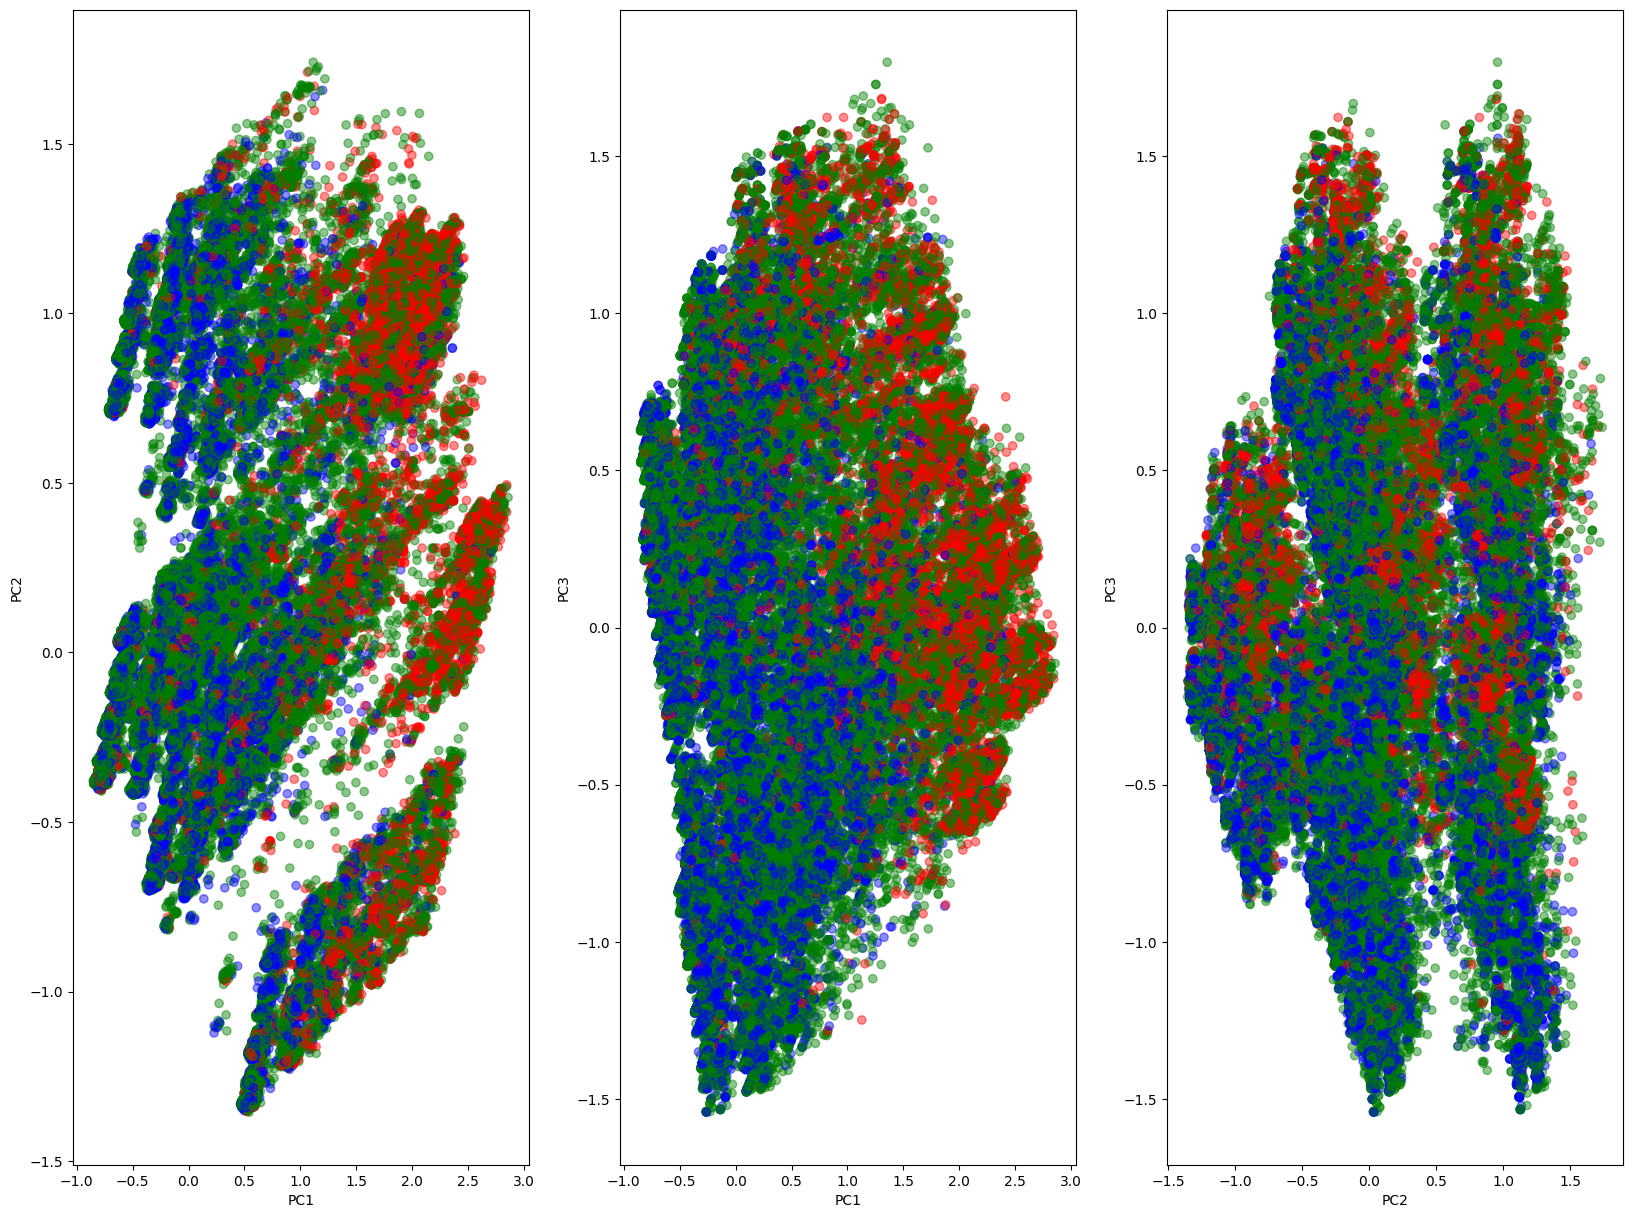

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(20, 15))
# fig.figure()
axes[0].scatter(pc1, pc2, c=colors, alpha = 0.45)
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

axes[1].scatter(pc1, pc3, c=colors, alpha =0.45)
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC3")

axes[2].scatter(pc2, pc3, c=colors, alpha =0.45)
axes[2].set_xlabel("PC2")
axes[2].set_ylabel("PC3")
plt.show()

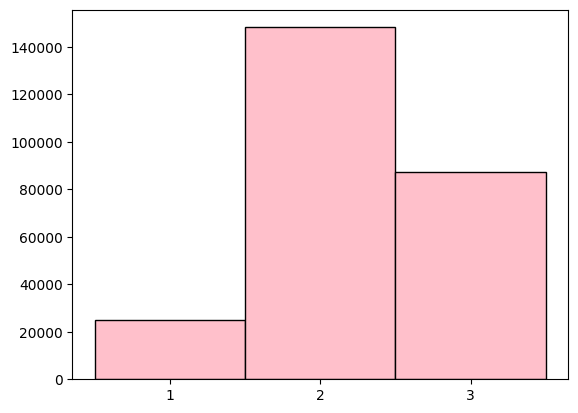

In [68]:
bin_edges = np.arange(np.floor(Y_train["damage_grade"].min()) - 0.5, np.ceil(Y_train["damage_grade"].max()) + 1.5)
plt.hist(Y_train, bins=bin_edges, edgecolor="black", color="pink", label=["grade 1", "grade 2", "grade 3"])
plt.xticks(np.arange(np.floor(Y_train["damage_grade"].min()), np.ceil(Y_train["damage_grade"].max()) + 1, 1))
plt.show()

In [69]:
X_train[Y_train["damage_grade"] == 3].shape

(87218, 38)

In [70]:
np.sum([i**2 for i in eig_vectors[0]])

0.999999999999998